In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.experimental.algorithms.mocmaes import MO_CMAES
from pymoo.factory import get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1, TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.experimental.ParDen import ParDen

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
gaussian_process = GaussianProcessRegressor()

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

algorithm = NSGA2(pop_size=20, n_offsprings=10, ref_dirs=ref_dirs)

# algorithm = MO_CMAES(mu=20, sigma=0.1, lambda_=10)

algorithm = ParDen(algorithm,
                   n_initial_doe=20,
                   surrogate=gaussian_process, 
                   maxfill=True,
                   look_ahead=True)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv      |     beta     |  nds_score   |   n_front   
    1 |      20 |  1.911750382 |  2.574224274 |  0.00000E+00 |        -1/-1 |  0.392727935 |            5
    2 |      30 |  1.884971666 |  1.722698625 |  0.00000E+00 |        9/120 |  0.728992402 |            7
    3 |      40 |  1.071389747 |  1.752249762 |  0.00000E+00 |        15/46 |  0.757526231 |            9
    4 |      50 |  0.373940522 |  1.605264945 |  0.225790573 |        22/84 |  0.658025779 |            9
    5 |      60 |  0.299065458 |  0.755570321 |  0.271885819 |        22/91 |  0.712341623 |            7
    6 |      70 |  0.269077226 |  0.792067453 |  0.304986670 |        11/27 |  0.632850848 |            9
    7 |      80 |  0.099785078 |  0.618076643 |  0.518693296 |        21/99 |  0.639863608 |           11
    8 |      90 |  0.071608448 |  0.299044994 |  0.547408201 |        22/69 |  0.695210936 |           14
    9 |     100 |  0.062807012 |  0.203632811 

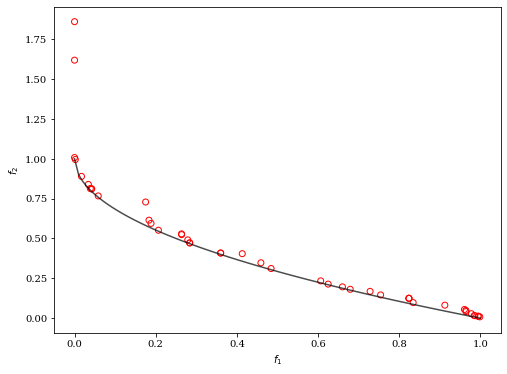

In [2]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [3]:
# algorithm.setup(problem, seed=2, termination=('n_evals', 250))

# for k in range(3):
#     algorithm.next()
    # print(algorithm.n_gen)

In [4]:
# res.F